# Credit Card Fraud Detection

### This dataset is a part of Kaggle competion meant to predict fradulant and non fraudulant credit card transactions. This dataset is quite big as it contains more than 284K rows along with 31 columns .  

In [25]:
# importing packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

%matplotlib inline

In [26]:
# importing dataset 'creditcard.csv'
df = pd.read_csv('creditcard.csv' ,delimiter = ',' , header = 0)
# printing the first five rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* The dataset has 31 columns starting from **'Time'** denotes the time of transaction followed by 28 other features from **'V1 to V28'** which I have no idea what they are following is **'Amount'** denotes the money in transaction and the last is labels **'Class'**, **0** represents **Non Fraudulant** and **'1'** represents **fraudulant** transaction  

In [27]:
# printing the shape of the dataset
print(df.shape)

(284807, 31)


In [28]:
#printing the columns of the dataset
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [29]:
# the dataset is big so to build a model we'll use only 50% of the dataset
df = df.sample(frac = 0.5 , random_state = 1)
df.shape

(142404, 31)

In [30]:
# Creating a data dictionary that gives the overview of the dataset columns
Data_dict = pd.DataFrame(df.dtypes)
Data_dict['MissingVal'] = df.isnull().sum()
Data_dict['UniqueVal'] = df.nunique()
Data_dict['Count'] = df.count()
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

### Feature Engineering

In [31]:
# printing the target values '0' stands for non fraudulant transactions and '1' stands for fraudulant transactions
print(df.Class.value_counts())

0    142177
1       227
Name: Class, dtype: int64


* We realise that the dataset is **highly unbalanced** towards a majority class which we can see from the below results.
* This could make a major impact on the model we train as it could be potentialy be more **biased** towards the majority class

### Data Preprocessing 

In [32]:
from sklearn.preprocessing import StandardScaler

# standarding or normalising the 'Amount' scaling between -1 to 1.
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].reshape(-1, 1))
# droping the 'Time' and 'Amount' column as Time have no effect of the prediction.
df.drop(['Time','Amount'],axis=1 , inplace =True )


c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
# describing the dataset
df.describe()

### Univariate Data Analysis

In [34]:
# plotting each column from the dataset
df.hist(figsize = (20,20))
plt.show()

### Multivariate Data Analysis

In [35]:
# ploting correlation matrix 
def plotting_corr( df , size = 18):
    corr = df.corr()
    fig , ax = plt.subplots(figsize = (size,size))
    cax = ax.matshow(corr)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    plt.title('Credit Card Dataset Correlation' , fontsize=28)
    plt.xticks(range(len(corr.columns)) , corr.columns);
    plt.yticks(range(len(corr.columns)) , corr.columns);

plotting_corr(df , size = 18)


In [36]:
# creating a function to split dataset into testing and training set
def data_preparation(df):
    df_features= df.iloc[:,df.columns != "Class"]
    df_labels=df.iloc[:,df.columns=="Class"]
    X_train, X_test, y_train, y_test = train_test_split(df_features,df_labels,test_size=0.3)
    print("Length of training data : {}".format(len(X_train)))
    print("Length of test data : {}".format(len(X_test)))
    return(X_train, X_test, y_train, y_test)

In [ ]:
# creating a function to building a model along with confusion matrix and auc roc curve
def model(model,X_train,X_test,y_train,y_test):
    clf= model
    clf.fit(X_train,y_train.values.ravel())
    pred=clf.predict(X_test)
    cnf_matrix=confusion_matrix(y_test,pred)
    
    print("The recall for this model is {}".format(cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0])))
    fig= plt.figure(figsize=(6,3))
    print("TP",cnf_matrix[1,1,]) # TP denotes True Positive
    print("TN",cnf_matrix[0,0]) # TN denotes True Negative
    print("FP",cnf_matrix[0,1]) # FP denotes False Positive
    print("FN",cnf_matrix[1,0]) # FN denotes False Negative
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("True class")
    plt.show()
    
    
    print("\n----------Classification Report------------------------------------")
    print(classification_report(y_test,pred))
    
    print("\n--------------Plotting_AUC_ROC_Curve--------------------------------")
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

### There are various ways to deal with unbalanced dataset like

* Random Resampling Techiniques like **Random Under Sampling** , **Random Over Sampling** and **Cluster-Based Over Sampling**.


* Informed Over Sampling Techniques like **Synthetic Minority Over Sampling Technique** also known as **SMOTE** or Modified SMOTE .


* Then there are Algorithmic Ensemble Techiniques like **Bagging Based** , **Boosting Based** like **ADa Boost** or **Gradient Tree Boosting** or **XG Boost** .


### First Let's see What is Oversampling and Undersampling.

* Dealing with imbalanced datasets entails strategies such as improving classification algorithms or balancing classes in the training data ( data preprocessing ) before providing the input to machine learning algorithm.


* The main objective of balancing classes is to either increasing the frequency of the minority class i.e **Over Sampling** or decreasing the frequency of the majority class i.e **Under Sampling**. This is done in order to obtain approximately the same no. of instances for both the classes.

### For this dataset we'll use Informed Over Sampling Technique Known as SMOTE.

* This technique is used to avoid any overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is then taken from the minority class as sample and then new synthetic instances are created. These synthetic instances are then added to  the original dataset. The new dataset is used as a sample to train the classification model. 

In [46]:
os = SMOTE(random_state = 0)
X_train , X_test , y_train , y_test = data_preparation(df)
columns = X_train.columns
# oversampling our training dataset for training
os_data_X,os_data_y=os.fit_sample(X_train,y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["Class"])

print("Length of oversampled data is  ",len(os_data_X))
print("Number of Non fraudulant transaction in oversampled data",len(os_data_y[os_data_y["Class"]==0]))
print("No.of fraud transaction in oversampled data",len(os_data_y[os_data_y["Class"]==1]))
print("Proportion of Non fraudulant data in oversampled data is ",len(os_data_y[os_data_y["Class"]==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_y[os_data_y["Class"]==1])/len(os_data_X))

length of training data
99682
length of test data
42722


c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  199080
Number of normal transcation in oversampled data 99540
No.of fraud transcation 99540
Proportion of Normal data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


### Understanding the confusion matrix and some of the model evaluation metrics

* A confusion matrix is a summary of prediction results of a clssification problem.


* It shows the ways in which the classification model is confused when it makes the prediction.


* Gives you insights not only into the errors being made by your classifier but the types of errors that are being made.


**1. What comes inside a confusion matrix**


* TP denotes true positive meaning the total no. positive labels which are correctly predicted.


* FP denotes false positive meaning the total no. negative labels which are predicted positively.


* TN denotes true negative meaning the total no. negative labels which are correctly predicted.


* FN denotes false negative meaning the total no. positive labels which are predicted negatively.


**2. Model Evaluation Metrics**


* **Accuracy** : **(TP+TN)/(TP+TN+FP+FN)**


* **Recall(True Postive Rate)** : **TP/(TP+FN)**


* **Precision** : **TP/(TP+FP)**


* **Specificity(False Positive Rate)** : **FP/(TN+FP)**


**3. AUC AND ROC CURVE**


* **Area Under Curve or Reciever Operating Characteristics Curve**


* X-axis denotes False positive rate


* Y-axis denotes True positive rate


* For a perfect classifier the ROC curve will go straight up the Y axis and then along the X axis. A classifier with no power will sit on the diagonal, whilst most classifiers fall somewhere in between.


* ROC curves also give us the ability to assess the performance of the classifier over its entire operating range.


* The AUC for a classifier with no power, essentially random guessing, is 0.5, because the curve follows the diagonal.


* The perfect classifier, is 1.0. Most classifiers have AUCs that fall somewhere between these two values


* **Top Left Corner**
    
    * The **ideal point** point.
    
    * False positive rate of zero.
    
    * True positve rate of one.

the recall for this model is 0.8470588235294118
TP 72
TN 42629
FP 8
FN 13


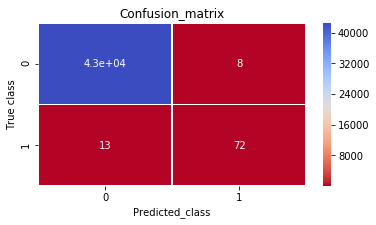


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     42637
          1       0.90      0.85      0.87        85

avg / total       1.00      1.00      1.00     42722


--------------Plotting_AUC_ROC_Curve--------------------------------


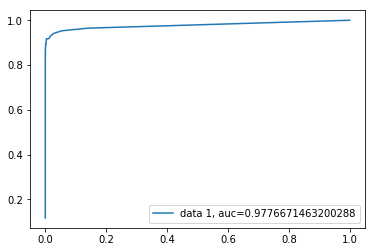

In [47]:
# using Random Forest Classifier as an estimator
clf = RandomForestClassifier(n_estimators = 100)
# calling the model function
model(clf ,os_data_X,X_test , os_data_y , y_test )

the recall for this model is 0.8636363636363636
TP 57
TN 42588
FP 68
FN 9


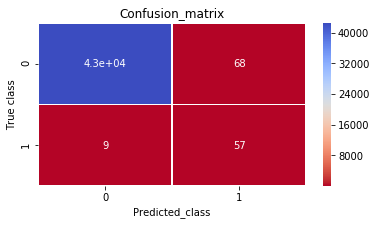


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     42656
          1       0.46      0.86      0.60        66

avg / total       1.00      1.00      1.00     42722



In [40]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
model(clf ,os_data_X,X_test , os_data_y , y_test )